## NAME Sidhantha Poddar
## Roll No 17BCE2044

Demonstration of Apriori algorithm on three different data sets with varying confidence (%) and
support (%)

# DATASET 1

In [3]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
            
            


In [8]:
import pandas as pd
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
 


In [5]:
oht = OnehotTransactions()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
print (df)           


   Apple   Corn   Dill   Eggs  Ice cream  Kidney Beans   Milk  Nutmeg  Onion  \
0  False  False  False   True      False          True   True    True   True   
1  False  False   True   True      False          True  False    True   True   
2   True  False  False   True      False          True   True   False  False   
3  False   True  False  False      False          True   True   False  False   
4  False   True  False   True       True          True  False   False   True   

   Unicorn  Yogurt  
0    False    True  
1    False    True  
2    False   False  
3     True    True  
4    False   False  


C:\Users\Sid\AppData\Local\conda\conda\envs\cten\lib\site-packages\mlxtend\preprocessing\onehot.py:66: DeprecationWarning: OnehotTransactions has been deprecated and will be removed in future. Please use TransactionEncoder instead.
  warnings.warn(msg, DeprecationWarning)


In [6]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print (frequent_itemsets)

    support                     itemsets
0       0.8                       (Eggs)
1       1.0               (Kidney Beans)
2       0.6                       (Milk)
3       0.6                      (Onion)
4       0.6                     (Yogurt)
5       0.8         (Eggs, Kidney Beans)
6       0.6                (Eggs, Onion)
7       0.6         (Kidney Beans, Milk)
8       0.6        (Kidney Beans, Onion)
9       0.6       (Yogurt, Kidney Beans)
10      0.6  (Eggs, Kidney Beans, Onion)


In [9]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
print (rules)

             antecedents            consequents  antecedent support  \
0                 (Eggs)                (Onion)                 0.8   
1                (Onion)                 (Eggs)                 0.6   
2   (Eggs, Kidney Beans)                (Onion)                 0.8   
3  (Kidney Beans, Onion)                 (Eggs)                 0.6   
4                 (Eggs)  (Kidney Beans, Onion)                 0.8   
5                (Onion)   (Eggs, Kidney Beans)                 0.6   

   consequent support  support  confidence  lift  leverage  conviction  
0                 0.6      0.6        0.75  1.25      0.12    1.600000  
1                 0.8      0.6        1.00  1.25      0.12         inf  
2                 0.6      0.6        0.75  1.25      0.12    1.600000  
3                 0.8      0.6        1.00  1.25      0.12         inf  
4                 0.6      0.6        0.75  1.25      0.12    1.600000  
5                 0.8      0.6        1.00  1.25      0.12      

In [10]:
support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])

C:\Users\Sid\AppData\Local\conda\conda\envs\cten\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\Sid\AppData\Local\conda\conda\envs\cten\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


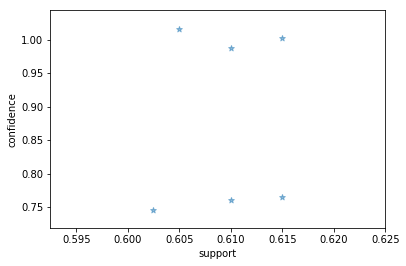

In [12]:
import random
import matplotlib.pyplot as plt
 
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

# DATASET 2

In [29]:
dataset = [['Milk', 'grapes', 'Yogurt'],
           ['Dill', 'grapes', 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'bread', 'Eggs'],
           ['Milk', 'butter', 'Corn', 'bread', 'Yogurt'],
           ['Corn', 'grapes', 'grapes', 'bread', 'Ice cream', 'Eggs'],
          ['Milk', 'grapes', 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Dill', 'grapes', 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'bread', 'Eggs'],
           ['Milk', 'butter', 'Corn', 'bread', 'Yogurt'],
           ['Corn', 'grapes', 'grapes', 'bread', 'Ice cream', 'Eggs'],
          ['Milk', 'grapes', 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Dill', 'grapes', 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'bread', 'Eggs'],
           ['Milk', 'butter',  'Yogurt'],
           ['Corn', 'grapes', 'grapes', 'bread', 'Ice cream', 'Eggs'],
          [ 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Dill', 'grapes', 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Milk', 'butter', 'Corn', 'bread', 'Yogurt'],
           ['Corn', 'grapes', 'grapes', 'bread', 'Ice cream', 'Eggs'],
          ['Milk', 'grapes',  'bread', 'Eggs', 'Yogurt'],
           ['Dill', 'grapes', 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'bread', 'Eggs'],
           ['Milk', 'butter', 'Corn', 'bread', 'Yogurt'],
           ['Corn', 'grapes', 'grapes', 'bread', 'Ice cream', 'Eggs'],
          ['Milk', 'grapes', 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Dill', 'grapes', 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'bread', 'Eggs'],
           ['Milk', 'butter', 'Corn', 'bread', 'Yogurt'],
           ['Corn', 'grapes', 'grapes', 'bread', 'Ice cream', 'Eggs']]
oht1 = OnehotTransactions()
oht_ary = oht1.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht1.columns_)
print (df) 
            

    Apple   Corn   Dill   Eggs  Ice cream   Milk  Yogurt  bread  butter  \
0   False  False  False  False      False   True    True  False   False   
1   False  False   True   True      False  False    True   True   False   
2    True  False  False   True      False   True   False   True   False   
3   False   True  False  False      False   True    True   True    True   
4   False   True  False   True       True  False   False   True   False   
5   False  False  False   True      False   True    True   True   False   
6   False  False   True   True      False  False    True   True   False   
7    True  False  False   True      False   True   False   True   False   
8   False   True  False  False      False   True    True   True    True   
9   False   True  False   True       True  False   False   True   False   
10  False  False  False   True      False   True    True   True   False   
11  False  False   True   True      False  False    True   True   False   
12   True  False  False  

C:\Users\Sid\AppData\Local\conda\conda\envs\cten\lib\site-packages\mlxtend\preprocessing\onehot.py:66: DeprecationWarning: OnehotTransactions has been deprecated and will be removed in future. Please use TransactionEncoder instead.
  warnings.warn(msg, DeprecationWarning)


In [30]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print (frequent_itemsets)

    support       itemsets
0  0.758621         (Eggs)
1  0.620690       (Yogurt)
2  0.931034        (bread)
3  0.758621  (bread, Eggs)


In [31]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=.8)
print (rules)

  antecedents consequents  antecedent support  consequent support   support  \
0     (bread)      (Eggs)            0.931034            0.758621  0.758621   
1      (Eggs)     (bread)            0.758621            0.931034  0.758621   

   confidence      lift  leverage  conviction  
0    0.814815  1.074074  0.052319    1.303448  
1    1.000000  1.074074  0.052319         inf  


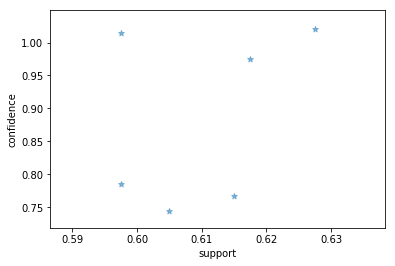

In [32]:
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

# Dataset 3

In [22]:
dataset = [
          ['Milk', 'grapes', 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Dill', 'grapes', 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'bread', 'Eggs'],
           [ 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Dill', 'grapes', 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Milk', 'butter', 'Corn', 'bread', 'Yogurt'],
           ['Corn', 'grapes', 'grapes', 'bread', 'Ice cream', 'Eggs'],
          ['Milk', 'grapes',  'bread', 'Eggs', 'Yogurt'],
           ['Dill', 'grapes', 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'bread', 'Eggs'],
           ['Milk', 'butter', 'Corn', 'bread', 'Yogurt'],
           ['Corn', 'grapes', 'grapes', 'bread', 'Ice cream', 'Eggs'],
          ['Milk', 'grapes', 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Dill', 'grapes', 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'bread', 'Eggs'],
           ['Milk', 'butter', 'Corn', 'bread', 'Yogurt'],
           ['Corn', 'grapes', 'grapes', 'bread', 'Ice cream', 'Eggs'],
           ['Milk', 'butter', 'Corn', 'bread', 'Yogurt'],
           ['Corn', 'grapes', 'grapes', 'bread', 'Ice cream', 'Eggs'],
          ['Milk', 'grapes', 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Dill', 'grapes', 'orange juice', 'bread', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'bread', 'Eggs'],
           ['Milk', 'butter',  'Yogurt'],
           ['Corn', 'grapes', 'grapes', 'bread', 'Ice cream', 'Eggs']
          ]
oht1 = OnehotTransactions()
oht_ary = oht1.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht1.columns_)
print (df) 
            

    Apple   Corn   Dill   Eggs  Ice cream   Milk  Yogurt  bread  butter  \
0   False  False  False   True      False   True    True   True   False   
1   False  False   True   True      False  False    True   True   False   
2    True  False  False   True      False   True   False   True   False   
3   False  False  False   True      False  False    True   True   False   
4   False  False   True   True      False  False    True   True   False   
5   False   True  False  False      False   True    True   True    True   
6   False   True  False   True       True  False   False   True   False   
7   False  False  False   True      False   True    True   True   False   
8   False  False   True   True      False  False    True   True   False   
9    True  False  False   True      False   True   False   True   False   
10  False   True  False  False      False   True    True   True    True   
11  False   True  False   True       True  False   False   True   False   
12  False  False  False  

C:\Users\Sid\AppData\Local\conda\conda\envs\cten\lib\site-packages\mlxtend\preprocessing\onehot.py:66: DeprecationWarning: OnehotTransactions has been deprecated and will be removed in future. Please use TransactionEncoder instead.
  warnings.warn(msg, DeprecationWarning)


In [23]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
print (frequent_itemsets)

    support       itemsets
0  0.791667         (Eggs)
1  0.625000       (Yogurt)
2  0.958333        (bread)
3  0.791667  (bread, Eggs)


In [27]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=.8)
print (rules)

  antecedents consequents  antecedent support  consequent support   support  \
0     (bread)      (Eggs)            0.958333            0.791667  0.791667   
1      (Eggs)     (bread)            0.791667            0.958333  0.791667   

   confidence      lift  leverage  conviction  
0    0.826087  1.043478  0.032986    1.197917  
1    1.000000  1.043478  0.032986         inf  


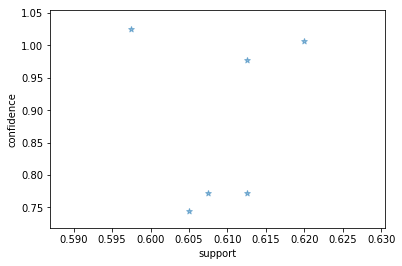

In [28]:
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()